### DACON(데이콘) 데이콘 Basic 자동차 가격 예측 AI 경진대회

##### RandomForest 모델 학습

In [1]:
# https://injo.tistory.com/30
# 랜덤 포레스트는 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘
# 배깅 방식 : 배깅(Bagging)은 Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 
# 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

In [2]:
import pandas as pd

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

In [5]:
preprocess_X

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel
0,2018,2014,16,47,85231,999,2
1,2010,2006,17,20,135000,1598,2
2,2002,2002,9,36,255223,1796,2
3,2006,2001,11,133,238000,2184,1
4,2007,2007,3,25,251000,1910,1
...,...,...,...,...,...,...,...
57915,2017,2011,9,23,64839,1461,1
57916,2006,2005,12,142,299850,1796,2
57917,2013,2003,3,90,112000,1368,2
57918,2006,2004,12,19,189321,1598,2


In [6]:
preprocess_Y

,Price
0,51.74
1,41.47
2,17.81
3,18.20
4,17.55
...,...
57915,116.87
57916,15.47
57917,21.97
57918,16.77


##### Train / Test 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(preprocess_X,preprocess_Y,test_size=0.2,random_state=777)

In [8]:
X_train.shape , y_train.shape

((45359, 7), (45359, 1))

In [9]:
X_test.shape , y_test.shape

((11340, 7), (11340, 1))

##### 모델 학습

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=777)

rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_21436\4211305117.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


##### 평가지표 : MAE, MSE, RMSE, MAPE

In [11]:
# 실제 정답 값과 예측 값의 차이를 절댓값으로 변환한 뒤 합산하여 평균을 구한다.
# 특이값이 많은 경우에 주로 사용된다.
# 값이 낮을수록 좋다.

#장점
#직관점임
#정답 및 예측 값과 같은 단위를 가짐

#단점
#실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
#스케일 의존적임(scal dependency): 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
mae

6.288356179374687

In [12]:
# MSE(Mean Squared Error) = 평균 제곱 오차
# 실제 정답 값과 예측 값의 차이를 제곱한 뒤 평균을 구한다.
# 값이 낮을수록 좋다.

# 장점
# 직관적임

# 단점
# 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
# 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
# 스케일 의존적임(scal dependency): 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

93.6992136465396

In [13]:
# RMSE(Root Mean Squared Error) = 평균 제곱근 오차
# MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.

# 값이 낮을수록 좋다.

# 장점
# 직관적임

# 단점
# 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
# 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
# 스케일 의존적임(scal dependency): 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음


from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

9.679835414227847

In [14]:
# R2 score = R squard
# 다른 지표(MAE, MSE, RMSE)들은 모델마다 값이 다르기 때문에 절대 값만 보고 선능을 판단하기 어렵다.
# R2 score는 상대적인 성능을 나타내기 비교가 쉽다.
# 실제 값의 분산 대비 예측값의 분산 비율을 의미한다.
# 1에 가까울 수록 좋다.

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.922762522163312

In [15]:
def regression_eval(y_test,y_pred):

    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    print("mae : ", mae)
    print("mse : ", mse)
    print("rmse : ", rmse)
    print("r2 : ", r2)


    return mae , mse , rmse , r2


mae , mse , rmse , r2 = regression_eval(y_test,y_pred)

mae :  6.288356179374687
mse :  93.6992136465396
rmse :  9.679835414227847
r2 :  0.922762522163312


In [16]:
evals = {'CV':'-','Mae':mae,'Mse':mse,'Rmse':rmse,'R2':r2}
evals

{'CV': '-',
 'Mae': 6.288356179374687,
 'Mse': 93.6992136465396,
 'Rmse': 9.679835414227847,
 'R2': 0.922762522163312}

##### Feature Importances (피처중요도)

In [17]:
rfr.feature_importances_ , preprocess_X.columns

(array([0.62142924, 0.03673117, 0.02953856, 0.04740492, 0.06890085,
        0.18841689, 0.00757837]),
 Index(['Year_prd', 'Year_model', 'Brand', 'Model', 'Mileage', 'CC', 'Fuel'], dtype='object'))

In [18]:
df_feature_importances = pd.DataFrame({'Features':preprocess_X.columns,'Importances':rfr.feature_importances_})
df_feature_importances

,Features,Importances
0,Year_prd,0.621429
1,Year_model,0.036731
2,Brand,0.029539
3,Model,0.047405
4,Mileage,0.068901
5,CC,0.188417
6,Fuel,0.007578


In [19]:
df_feature_importances = df_feature_importances.sort_values('Importances',ascending=False)

<Axes: xlabel='Importances', ylabel='Features'>

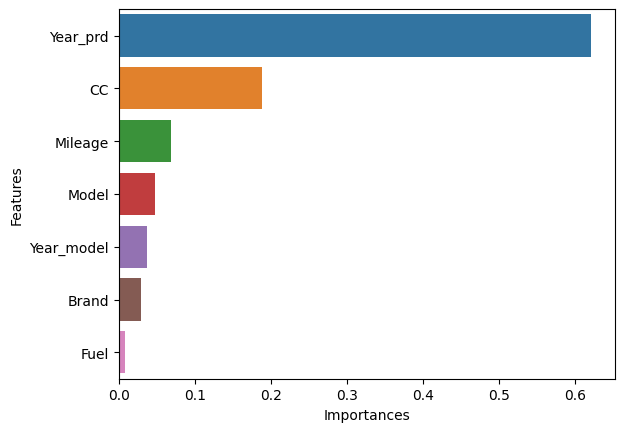

In [20]:
import seaborn as sns

sns.barplot(x='Importances',y='Features',data=df_feature_importances)

##### K-FOLD 교차 검증 학습 

In [21]:
import pandas as pd

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

In [22]:
from sklearn.model_selection import KFold

def exec_kfold(preprocess_X,preprocess_Y,folds=5):

    from sklearn.ensemble import RandomForestRegressor
    import numpy as np

    rfr = RandomForestRegressor(random_state=777)

    kfold = KFold(n_splits=folds)
    evals = dict({'Mae':[],'Mse':[],'Rmse':[],'R2':[]})
    mean_evals = dict({'Mae':[],'Mse':[],'Rmse':[],'R2':[]})
    
    # KFold 교차 검증 수행
    for iter_count , (train_index, test_index) in enumerate(kfold.split(preprocess_X)):

        print(str(iter_count+1) + "번째 fold")
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = preprocess_X.values[train_index], preprocess_X.values[test_index]
        y_train, y_test = preprocess_Y.values[train_index], preprocess_Y.values[test_index]
        
        # 회귀 모델 학습, 예측 
        rfr.fit(X_train, y_train) 
        y_pred = rfr.predict(X_test)

        # mae, mse, rmse, r2 
        mae , mse , rmse , r2 = regression_eval(y_test,y_pred)

        evals['Mae'].append(mae)
        evals['Mse'].append(mse)
        evals['Rmse'].append(rmse)
        evals['R2'].append(r2)

    mean_evals['CV'] = 'KFOLD = ' + str(folds) +'(mean)'
    for key in evals.keys():
        print("평균 ",key, " : ", np.mean(evals[key]))
        # mean_evals['Mean_'+key] = np.mean(evals[key])
        mean_evals[key] = np.mean(evals[key])

    return mean_evals

# exec_kfold 호출
mean_evals = exec_kfold(preprocess_X,preprocess_Y,folds=5) 

1번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_21436\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.519950620825284
mse :  105.62909781473013
rmse :  10.277601754044088
r2 :  0.9119767876120335
2번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_21436\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.303551827947846
mse :  96.94447935629475
rmse :  9.846038764716232
r2 :  0.9191841649415724
3번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_21436\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.403204541866129
mse :  96.50537650257074
rmse :  9.823715005158219
r2 :  0.9197230598104128
4번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_21436\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.2572756220271515
mse :  93.37661726352938
rmse :  9.663157727344068
r2 :  0.9205109383392128
5번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_21436\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.376833339079124
mse :  97.30860091804941
rmse :  9.864512198687242
r2 :  0.9177263007860396
평균  Mae  :  6.372163190349107
평균  Mse  :  97.95283437103488
평균  Rmse  :  9.895005089989969
평균  R2  :  0.9178242502978542


##### No Cross Validation vs Cross Validation 평가 지표 비교

In [23]:
import pandas as pd

df_evals = pd.DataFrame(evals,index=[0])
df_evals

,CV,Mae,Mse,Rmse,R2
0,-,6.288356,93.699214,9.679835,0.922763


In [24]:
df_mean_evals= pd.DataFrame(mean_evals,index=[0])
df_mean_evals = df_mean_evals[['CV','Mae','Mse','Rmse','R2']]
df_mean_evals

,CV,Mae,Mse,Rmse,R2
0,KFOLD = 5(mean),6.372163,97.952834,9.895005,0.917824


##### GridSearchcv 하이퍼 파라미터 조정

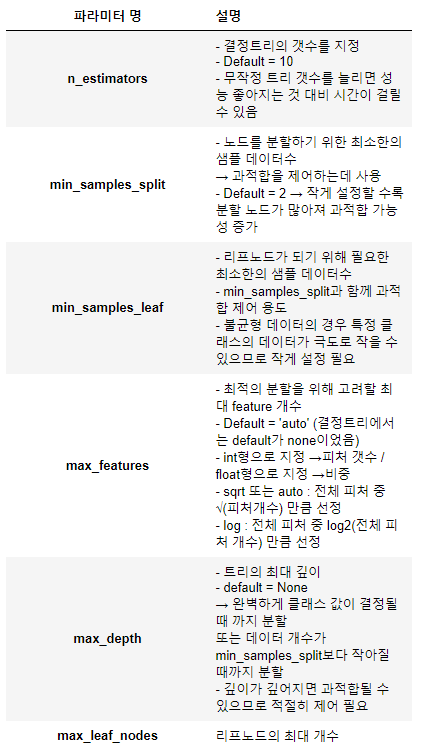

In [25]:
# params_grid = { 'n_estimators' : [100,200],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import time
import warnings


warnings.filterwarnings(action='ignore')

rfr = RandomForestRegressor(random_state=777)

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

X_train, X_test , y_train , y_test = train_test_split(preprocess_X,preprocess_Y,test_size=0.2,random_state=777)

scorings = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
# param_grid = { 
#         "n_estimators"      : [5,10,15,20,25,30],
#         "max_features"      : ["auto", "sqrt", "log2"],
#         "max_depth" : [1,2,3,4],
#         'max_leaf_nodes': [None,2,4,6,8], 
#         "min_samples_split" : [2,4,6,8],
#         'min_samples_leaf':[2,4,6,8], 
#         # "bootstrap": [True, False],
#         }

params_grid = { 'n_estimators' : [100,200],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

start = time.time()

for scoring in scorings:

    print("----------- scoring type : ", scoring," ----------- ")

    # n_jobs = -1 모든 CPU 코어 사용
    grid_rfr = GridSearchCV(rfr, 
                            param_grid=params_grid , 
                            scoring=scoring, 
                            cv=5,
                            n_jobs=-1)
    
    grid_rfr.fit(X_train , y_train)

    print('GridSearchCV 최적 하이퍼 파라미터 :',grid_rfr.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rfr.best_score_))
    best_dclf = grid_rfr.best_estimator_

    # GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
    y_pred = best_dclf.predict(X_test)

    if scoring == 'neg_mean_absolute_error':
        mae = mean_absolute_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mae : ', mae)
    elif scoring == 'neg_mean_squared_error':
        mse = mean_squared_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mse : ', mse)
    elif scoring == 'neg_root_mean_squared_error':
        rmse = np.sqrt(mean_squared_error(y_test , y_pred))
        print('테스트 세트에서의 RandomForestRegressor rmse : ', rmse)
    else:
        r2 = r2_score(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor r2 : ', r2)

print("GridSearchcv 소요시간 : ", time.time()-start)

----------- scoring type :  neg_mean_absolute_error  ----------- 
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
GridSearchCV 최고 정확도: -6.8124
테스트 세트에서의 RandomForestRegressor mae :  6.598255562313608
----------- scoring type :  neg_mean_squared_error  ----------- 
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
GridSearchCV 최고 정확도: -108.2631
테스트 세트에서의 RandomForestRegressor mse :  98.68880964534686
----------- scoring type :  neg_root_mean_squared_error  ----------- 
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
GridSearchCV 최고 정확도: -10.4039
테스트 세트에서의 RandomForestRegressor rmse :  9.934224159205733
----------- scoring type :  r2  ----------- 
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
GridSearchCV 최고 정확도: 0.9087
테스트 세트에서의 Ra

In [ ]:
# params_grid = { 'n_estimators' : [200,300,400],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import time
import warnings


warnings.filterwarnings(action='ignore')

rfr = RandomForestRegressor(random_state=777)

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

X_train, X_test , y_train , y_test = train_test_split(preprocess_X,preprocess_Y,test_size=0.2,random_state=777)

scorings = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
# param_grid = { 
#         "n_estimators"      : [5,10,15,20,25,30],
#         "max_features"      : ["auto", "sqrt", "log2"],
#         "max_depth" : [1,2,3,4],
#         'max_leaf_nodes': [None,2,4,6,8], 
#         "min_samples_split" : [2,4,6,8],
#         'min_samples_leaf':[2,4,6,8], 
#         # "bootstrap": [True, False],
#         }

params_grid = { 'n_estimators' : [200,300,400],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

start = time.time()

for scoring in scorings:

    print("----------- scoring type : ", scoring," ----------- ")

    # n_jobs = -1 모든 CPU 코어 사용
    grid_rfr = GridSearchCV(rfr, 
                            param_grid=params_grid , 
                            scoring=scoring, 
                            cv=5,
                            n_jobs=-1)
    
    grid_rfr.fit(X_train , y_train)

    print('GridSearchCV 최적 하이퍼 파라미터 :',grid_rfr.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rfr.best_score_))
    best_dclf = grid_rfr.best_estimator_

    # GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
    y_pred = best_dclf.predict(X_test)

    if scoring == 'neg_mean_absolute_error':
        mae = mean_absolute_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mae : ', mae)
    elif scoring == 'neg_mean_squared_error':
        mse = mean_squared_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mse : ', mse)
    elif scoring == 'neg_root_mean_squared_error':
        rmse = np.sqrt(mean_squared_error(y_test , y_pred))
        print('테스트 세트에서의 RandomForestRegressor rmse : ', rmse)
    else:
        r2 = r2_score(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor r2 : ', r2)

print("GridSearchcv 소요시간 : ", time.time()-start)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import time
import warnings


warnings.filterwarnings(action='ignore')

rfr = RandomForestRegressor(random_state=777)

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

X_train, X_test , y_train , y_test = train_test_split(preprocess_X,preprocess_Y,test_size=0.2,random_state=777)

scorings = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
# param_grid = { 
#         "n_estimators"      : [5,10,15,20,25,30],
#         "max_features"      : ["auto", "sqrt", "log2"],
#         "max_depth" : [1,2,3,4],
#         'max_leaf_nodes': [None,2,4,6,8], 
#         "min_samples_split" : [2,4,6,8],
#         'min_samples_leaf':[2,4,6,8], 
#         # "bootstrap": [True, False],
#         }

params_grid = { 'n_estimators' : [600,800,1000],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [4,8,12,16],
           'min_samples_split' : [4,8,12,16]
            }

start = time.time()

for scoring in scorings:

    print("----------- scoring type : ", scoring," ----------- ")

    # n_jobs = -1 모든 CPU 코어 사용
    grid_rfr = GridSearchCV(rfr, 
                            param_grid=params_grid , 
                            scoring=scoring, 
                            cv=5,
                            n_jobs=-1)
    
    grid_rfr.fit(X_train , y_train)

    print('GridSearchCV 최적 하이퍼 파라미터 :',grid_rfr.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rfr.best_score_))
    best_dclf = grid_rfr.best_estimator_

    # GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
    y_pred = best_dclf.predict(X_test)

    if scoring == 'neg_mean_absolute_error':
        mae = mean_absolute_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mae : ', mae)
    elif scoring == 'neg_mean_squared_error':
        mse = mean_squared_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mse : ', mse)
    elif scoring == 'neg_root_mean_squared_error':
        rmse = np.sqrt(mean_squared_error(y_test , y_pred))
        print('테스트 세트에서의 RandomForestRegressor rmse : ', rmse)
    else:
        r2 = r2_score(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor r2 : ', r2)

print("GridSearchcv 소요시간 : ", time.time()-start)